In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

from category_encoders.ordinal import OrdinalEncoder
from category_encoders.woe import WOEEncoder
from category_encoders.target_encoder import TargetEncoder
from category_encoders.sum_coding import SumEncoder
from category_encoders.m_estimate import MEstimateEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder
from category_encoders.helmert import HelmertEncoder
from category_encoders.cat_boost import CatBoostEncoder
from category_encoders.james_stein import JamesSteinEncoder
from category_encoders.one_hot import OneHotEncoder

In [ ]:
#!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 776 kB/s 


In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
X = [['Male', 1], ['Female', 3], ['Female', 2]]

In [ ]:
enc.fit(X)

OneHotEncoder(handle_unknown='ignore')

In [ ]:
enc.categories_

[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]

In [ ]:
enc.transform([['Female', 1], ['Male', 4], ['Male', 3], ['Male', 2]]).toarray()

array([[1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0.]])

array([['Male', 1],
       [None, 2]], dtype=object)

In [ ]:
enc.get_feature_names_out(['gender', 'group'])

array(['gender_Female', 'gender_Male', 'group_1', 'group_2', 'group_3'],
      dtype=object)

In [ ]:
le = LabelEncoder()

In [ ]:
le.fit([1, 2, 2, 6])

LabelEncoder()

In [ ]:
le.classes_

array([1, 2, 6])

In [ ]:
le.transform([1, 1, 2, 6])

array([0, 0, 1, 2])

In [ ]:
df = pd.read_csv('abalone/abalone.data.csv', names=['sex', 'length', 'diameter', 'height', 'wh_weight', 'shuck_weight', 'visc_weight', 'shell_veight', 'rings'])

FileNotFoundError: ignored

In [ ]:
df.head()

,sex,length,diameter,height,wh_weight,shuck_weight,visc_weight,shell_veight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
label = LabelEncoder()

df['sex_le'] = label.fit_transform(df['sex'])

In [ ]:
df.head()

,sex,length,diameter,height,wh_weight,shuck_weight,visc_weight,shell_veight,rings,sex_le
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,2
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,2
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,2
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


In [ ]:
dummies = pd.get_dummies(df, columns=['sex'], drop_first=True, sparse=True)

In [ ]:
dummies

,length,diameter,height,wh_weight,shuck_weight,visc_weight,shell_veight,rings,sex_le,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,2,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0,0,0


In [ ]:
SE_encoder =SumEncoder(['sex'])
df_se = SE_encoder.fit_transform(df[['sex']], df['rings'])

/usr/local/lib/python3.7/dist-packages/category_encoders/base_contrast_encoder.py:127: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  category=FutureWarning)


In [ ]:
df_se.head()

,intercept,sex_0,sex_1
0,1,1.0,0.0
1,1,1.0,0.0
2,1,0.0,1.0
3,1,1.0,0.0
4,1,-1.0,-1.0


In [ ]:
HE_encoder = HelmertEncoder(['sex'])  # OHE and Sum Encoding.
df_he = HE_encoder.fit_transform(df[['sex']], df['rings'])

/usr/local/lib/python3.7/dist-packages/category_encoders/base_contrast_encoder.py:127: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  category=FutureWarning)


In [ ]:
df_he.head()

,intercept,sex_0,sex_1
0,1,-1.0,-1.0
1,1,-1.0,-1.0
2,1,1.0,-1.0
3,1,-1.0,-1.0
4,1,0.0,2.0


Target encoder

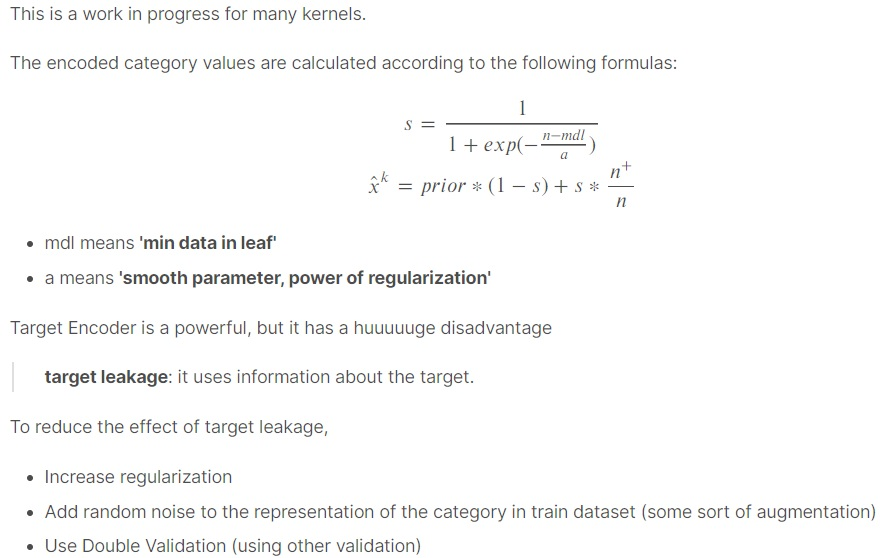

In [ ]:
TE_encoder = TargetEncoder()
df_te = TE_encoder.fit_transform(df[['sex']], df['rings'])

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:124: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:129: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [ ]:
df_te.head()

,sex
0,10.705497
1,10.705497
2,11.129304
3,10.705497
4,7.890462


In [ ]:
MEE_encoder = MEstimateEncoder()  # Simplified version of Target Encoder
df_mee = MEE_encoder.fit_transform(df[['sex']], df['rings'])

In [ ]:
df_mee.head()

,sex
0,10.704993
1,10.704993
2,11.128390
3,10.704993
4,7.891983


In [ ]:
WOE_encoder = WOEEncoder()   # Weight Of Evidence is a commonly used target-based encoder in credit scoring.
#df_woe = WOE_encoder.fit_transform(df[['sex']], df['rings']) # for binary classification only

In [ ]:
JSE_encoder = JamesSteinEncoder()
df_jse = JSE_encoder.fit_transform(df[['sex']], df['rings'])

In [ ]:
df_jse.head()

,sex
0,10.705497
1,10.705497
2,11.129304
3,10.705497
4,7.890462


In [ ]:
LOOE_encoder = LeaveOneOutEncoder()
df_looe = LOOE_encoder.fit_transform(df[['sex']], df['rings'])

In [ ]:
df_looe.head()

,sex
0,10.702685
1,10.707924
2,11.130934
3,10.705959
4,7.891126


In [ ]:
CBE_encoder = CatBoostEncoder()
df_cbe = CBE_encoder.fit_transform(df[['sex']], df['rings'])

NameError: ignored

In [ ]:
df_cbe.head(100)

NameError: ignored

In [ ]:
# IMBALANCED

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
from collections import Counter
print(sorted(Counter(y).items()))
print(sorted(Counter(y_resampled).items()))

[(0, 64), (1, 262), (2, 4674)]
[(0, 3148), (1, 3148), (2, 3148)]


In [ ]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

In [ ]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 4060), (1, 4381), (2, 3502)]


In [ ]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 4499), (1, 4566), (2, 4413)]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_resampled, y_resampled)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = neigh.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.946060606060606